### Import package 

In [1]:
import os, rasterio, geopandas as gpd, rioxarray as rxr, geopandas as gpd, contextily as ctx

import matplotlib.pyplot as plt, numpy as np
from rasterio import plot as rasterplot
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colors import Normalize 
from matplotlib.ticker import PercentFormatter

c:\Users\jeongho2\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Function

In [2]:
# return a list of files containing given strings at the beginning and end
def getFileList(path=None, start=None, end=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.startswith(start) and i.endswith(end)]
    return file_list

# return a list of files containing given strings at the end
def getFileList_end(path=None, end=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.endswith(end)]
    return file_list

# return a list of files containing given strings at the beginning
def getFileList_start(path=None, start=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.startswith(start)]
    return file_list

### Plot raster file

*Plot a raster file of categorical variable (e.g., Aspect)*

In [7]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure' 
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
wk_path = os.path.join(base_path, '04-Soil') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht


# file_ls = file_ls[:1]


for file in file_ls:
    ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze() # read a raster file using 'rioxarray' library

    fig, ax = plt.subplots(figsize=(8,6))
    ras.plot.imshow(cmap='Paired') #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax.set(title=" ")
    ax.set_axis_off()
    ax.set_title(f"{file[:-4]}")
    
    # Save the figure as *.png format
    out_fig = os.path.join(fig_path, f"{file[:-4]}_categ.png")
    plt.savefig(out_fig, dpi = 500)
    plt.close() # close a figure window
print("Done")   

Done


*Plot a raster file of numerical (continuous) variable (e.g., Slope)*

In [8]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure'
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
wk_path = os.path.join(base_path, '04-Soil') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht

# file_ls = ['Slope_degree_LT_30.tif']

for file in file_ls:
    ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze() # read a raster file using 'rioxarray' library
    
    fix, ax = plt.subplots(figsize=(8,6))
    ras.plot.imshow(cmap='Spectral') #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax.set(title=" ")
    ax.set_axis_off()
    ax.set_title(f"{file[:-4]}")
    
    # Save the figure as *.png format
    out_fig = os.path.join(fig_path, f"{file[:-4]}_continu.png")
    plt.savefig(out_fig, dpi = 500)
    plt. close() # close a figure window
print("Done")   

Done


### Plot point shapefile (vector image) uring geopandas

epsg:4326


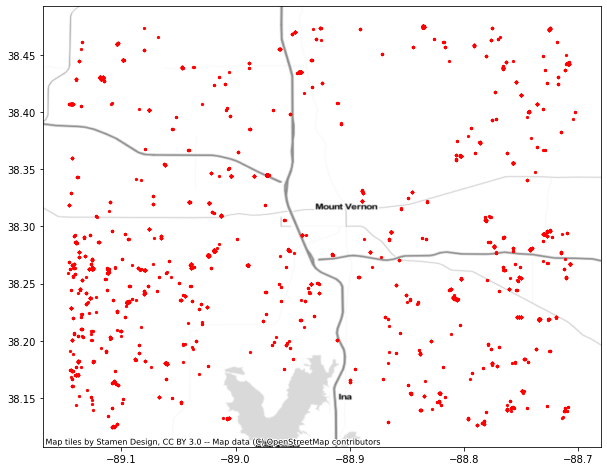

In [5]:
# data path 
gully_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input\00-Gully_location\revised_high_GT_12.shp'

# Read the shapefile into a GeoDataFrame:
gully = gpd.read_file(gully_path)

# check the CRS of a GeoPandas GeoDataFrame
print(gully.crs)

# Plot the GeoDataFrame using Matplotlib:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
gully.plot(ax=ax, marker='o', color='red', markersize=5)

# add a background map using Contextily
ctx.add_basemap(ax=ax, crs=gully.crs.to_string(), source=ctx.providers.Stamen.TonerLite) 

# add a background satellite image  using Contextily
# ctx.add_basemap(ax=ax, crs=gully.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# # Save the figure as *.png format
# out_fig = os.path.join(fig_path, "gully_erosion_location.png")
# plt.savefig(out_fig, dpi = 500)
# plt. close() # close a figure window


plt.show()

### Plot raster and point file

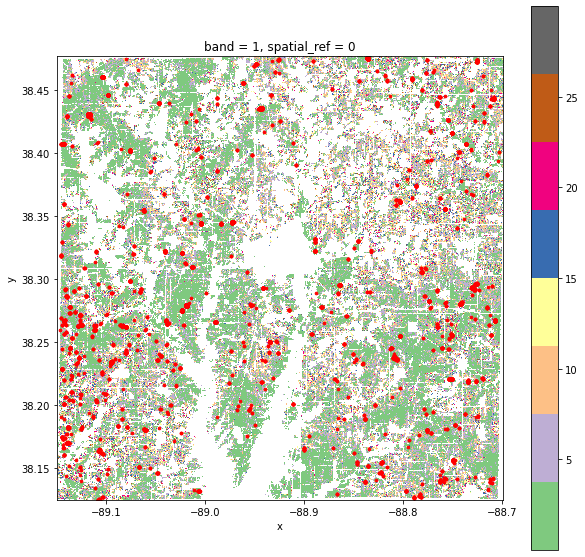

Done


In [6]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure'
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
gully_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input\00-Gully_location\revised_high_GT_12.shp'
wk_path = os.path.join(base_path, '01-topography') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht

file_ls = ['Slope_degree_LT_30.tif']

for file in file_ls:
    # Read in the raster data using rioxarray:
    raster = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze()

    # Read in the point shapefile using geopandas:
    points = gpd.read_file(gully_path)

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the raster data using plot.imshow:
    raster.plot.imshow(ax=ax, cmap='Accent')
    
    # Plot the point shapefile on the same axis using plot:
    points.plot(ax=ax, markersize=7, color='red')

    # Set the x and y limits of the plot to match the extent of the raster data:
    ax.set_xlim([raster.x.min(), raster.x.max()])
    ax.set_ylim([raster.y.min(), raster.y.max()])

    plt.show()
    
    # # Save the figure as *.png format
    # out_fig = os.path.join(fig_path, "slope_point.png")
    # plt.savefig(out_fig, dpi = 500)
    # plt. close() # close a figure window
print("Done")   